Coding assignement :

We have to solve the following partial differential equations :

\begin{align}
\frac{\partial u}{\partial t} &= D_u \nabla ^2 u - uv^2 + F(1-u)\\
\frac{\partial v}{\partial t} &= D_v \nabla ^2 v + uv^2 - (F + k)v
\end{align}

Let's discretize our equation :

\begin{eqnarray}
\frac{u^{n+1}_{i,j} - u^n_{i,j}}{\Delta t}
= \frac{Du}{\delta^2} &\left( u^{n}_{i+1, j} + u^{n}_{i-1,j} - 4u^{n}_{i,j} + u^{n}_{i, j+1} + u^{n}_{i,j-1}\right) - u^{n}_{i, j}(v^{n}_{i, j})^2 + F(1 - u^{n}_{i, j})
\end{eqnarray}
\begin{eqnarray}
\frac{v^{n+1}_{i,j} - v^n_{i,j}}{\Delta t}
= \frac{Dv}{\delta^2} &\left( v^{n}_{i+1, j} + v^{n}_{i-1,j} - 4v^{n}_{i,j} + v^{n}_{i, j+1} + v^{n}_{i,j-1}\right) + u^{n}_{i, j}(v^{n}_{i, j})^2 - (F + k) v^{n}_{i, j}
\end{eqnarray}

Wich leads to :

\begin{eqnarray}
u^{n+1}_{i,j}
=  u^n_{i,j} + \Delta t \left( \frac{Du}{\delta^2} \left( u^{n}_{i+1, j} + u^{n}_{i-1,j} - 4u^{n}_{i,j} + u^{n}_{i, j+1} + u^{n}_{i,j-1}\right) - u^{n}_{i, j}(v^{n}_{i, j})^2 + F(1 - u^{n}_{i, j}) \right)
\end{eqnarray}
\begin{eqnarray}
v^{n+1}_{i,j}
= v^n_{i,j} + \Delta t \left( \frac{Dv}{\delta^2} \left( v^{n}_{i+1, j} + v^{n}_{i-1,j} - 4v^{n}_{i,j} + v^{n}_{i, j+1} + v^{n}_{i,j-1}\right) + u^{n}_{i, j}(v^{n}_{i, j})^2 - (F + k) v^{n}_{i, j} \right)
\end{eqnarray}

We are here going to use the explicit way of numerically solve this equation.

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def solveeq(u, v, nt, Du, Dv, F, k, dt, dh, r=True):
    """ 
    modify directly u and v in such a way to solve the equation (not a copy of u and v)
    
    Parameters :
    ------------
    u  : 2D array of floats:
         initial condition of u
    v  : 2D array of floats:
         initial condition of v
    nt : int
         number of time step
    Du : float
         speed of the diffusion of u
    Dv : float
         speed of the diffusion of v
    F  : float
         Feed rate
    k  : float
         kill rate
    dt : float
         lenght of a time-step
    dh : float
         lenght of a space-step (dx = dy = dh)
    r  : Bool
         choose if we return u or v
         
    Return :
    --------
    0  : int 
         if everything went ok, return 0
    """
    output=numpy.empty_like(u)
    
    for n in range(nt):
        un = u.copy()
        vn= v.copy()
        u[1:-1,1:-1] = un[1:-1,1:-1] + dt*(Du/dh/dh * (un[2:,1:-1] - 4*un[1:-1,1:-1] + un[:-2,1:-1] + un[1:-1,2:] + un[1:-1,:-2]) - un[1:-1,1:-1]*vn[1:-1,1:-1]*vn[1:-1,1:-1] + F*(1-un[1:-1,1:-1])) #nonlinear + feed/kill part
        v[1:-1,1:-1] = vn[1:-1,1:-1] + dt*(Dv/dh/dh * (vn[2:,1:-1] - 4*vn[1:-1,1:-1] + vn[:-2,1:-1] + vn[1:-1,2:] + vn[1:-1,:-2]) + un[1:-1,1:-1]*vn[1:-1,1:-1]*vn[1:-1,1:-1] - (F+k)*vn[1:-1,1:-1]) #nonlinear + feed/kill part
  
        # Enforce Neumann BCs
        u[1,:] = u[2,:]
        u[:,1] = u[:, 2]
        u[-1,:] = u[-2,:]
        u[:,-1] = u[:,-2]
        v[1,:] = v[2,:]
        v[:,1] = v[:, 2]
        v[-1,:] = v[-2,:]
        v[:,-1] = v[:,-2]
    
    
    if r==True:
        output=u
    else:
        output=v
        
    return output

Bacteria 1


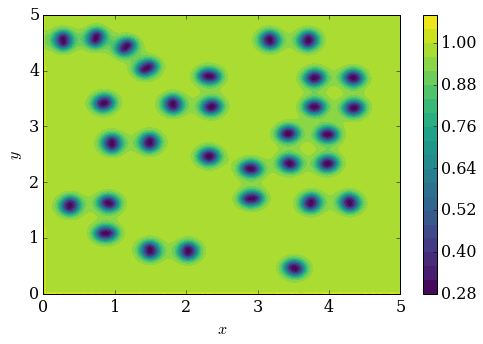

In [5]:
#run the simulation for every suggested initial conditions
n = 192
for select in range(1,2): #change the range here to select different pattern only Bacteria 1 selected by default
    uvinitial = numpy.load('./data/uvinitial.npz')
    U = uvinitial['U']
    V = uvinitial['V']
    if select==1 :
        Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1
        print("Bacteria 1")
    if select==2 :
        Du, Dv, F, k = 0.00014, 0.00006, 0.035, 0.065 # Bacteria 2
        print("Bacteria 2")
    if select==3 :    
        Du, Dv, F, k = 0.00016, 0.00008, 0.060, 0.062 # Coral
        print("Coral")
    if select==4 :
        Du, Dv, F, k = 0.00019, 0.00005, 0.060, 0.062 # Fingerprint
        print("Fingerprint")
    if select==5 :
        Du, Dv, F, k = 0.00010, 0.00010, 0.018, 0.050 # Spirals
        print("Spirals")
    if select==6 :
        Du, Dv, F, k = 0.00012, 0.00008, 0.020, 0.050 # Spirals Dense
        print("Spirals Dense")
    if select==7 :
        Du, Dv, F, k = 0.00010, 0.00016, 0.020, 0.050 # Spirals Fast
        print("Spirals Fast")
    if select==8 :
        Du, Dv, F, k = 0.00016, 0.00008, 0.020, 0.055 # Unstable
        print("Unstable")
    if select==9 :
        Du, Dv, F, k = 0.00016, 0.00008, 0.050, 0.065 # Worms 1
        print("Worms 1")
    if select==10 :
        Du, Dv, F, k = 0.00016, 0.00008, 0.054, 0.063 # Worms 2
        print("Worms 2")
    if select==11 :
        Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.060 # Zebrafish
        print("Zebrafish")
        
    #calculating other usefull variables    
    dh = 5./(n-1)
    T = 800
    dt = .5 * dh**2 / (4*max(Du,Dv))
    nt = int(T/dt)
    
    #solving
    result = solveeq(U.copy(), V.copy(), nt, Du, Dv, F, k, dt, dh)
    
    #printing solution
    x = numpy.linspace(0,5.,n)
    y = numpy.linspace(0,5.,n)
    pyplot.figure(figsize=(8,5))
    pyplot.contourf(x,y,result,20,cmap=cm.viridis)
    pyplot.xlabel('$x$')
    pyplot.ylabel('$y$')
    pyplot.colorbar();
    

As we can see, it emerge a lot of different comportement of this equation depend of the initial values. It is, of course quite understanable because of the non-linearity of the equation. We have been able to reproduce all of the suggested comportements except for the spirals for unknown reason.
(You can change the code above to select other patterns)

What is more interesting is that we can find those comportement in nature if you look at the scheme of the fur of some animals for example. This could explain why we see some of those patern emerge being only because of a semblable reaction. 

What about implicit scheme ?

We have tried to write the implicit alogrithm for this version, however, it is now very clear that such an algorithm ask way to much computing power, indeed, for each type of concentration, we need to create a $(190)^4$ float array to store the evolution matrix. Let's not talk about solving a linear system with such a matrix. We have tried to inverse the matrix (as it does not change during the execution of the algorithm) to juste have to use matrix-vector multiplication but it is still a lot of computation. It is not realisable for a personnal computer as the one's we have access to. You can have a look at the code but do not try to execute it as it will take a lot of ressource from your computer (raising Memory error's even with 16Go of RAM). The gitHub link is the following : https://github.com/costerck/numerical-mooc/tree/master/working/Lesson%204/Implicit.ipynb (do not forget to download the data file as well).

For a very small value of n (the number of space steps) such as 20 or 30, the code run quite smoothly but we haven't been able to observe any pattern because of the low resolution of the simulation.
